# Task 3 Applying Text Classification  and Sentiment Analysis

## Importing necessary libraries

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
import string
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# EDA process

## Data Collection

In [3]:
reviews=pd.read_csv("Restaurant_Reviews.tsv",sep='\t')


## Data Understanding

In [4]:
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
reviews.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
reviews.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


## Checking missing values

In [7]:
reviews.isna()

,Review,Liked
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
995,False,False
996,False,False
997,False,False
998,False,False


In [8]:
reviews.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [9]:
reviews.nunique()

Review    996
Liked       2
dtype: int64

In [10]:
reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


## Pre-processing step

In [11]:
stop_words = nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9]+").tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text


In [12]:
print(reviews.groupby("Liked").count())

       Review
Liked        
0         500
1         500


## Applying Preprocessing step

In [13]:
reviews['Review']=reviews['Review'].apply(preprocess_text)
reviews.head()

,Review,Liked
0,"[wow, love, place]",1
1,"[crust, good]",0
2,"[tasti, textur, nasti]",0
3,"[stop, late, may, bank, holiday, rick, steve, ...",1
4,"[select, menu, great, price]",1


## Time Frequency Matrix

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews["Review"].map(''.join))
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,969,970,971,972,973,974,975,976,977,978
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Train test split process

In [15]:
from sklearn.model_selection import train_test_split
y = reviews['Liked']
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8, test_size=0.2, random_state=99)


## Providing Balanced dataset

<Axes: xlabel='Liked', ylabel='count'>

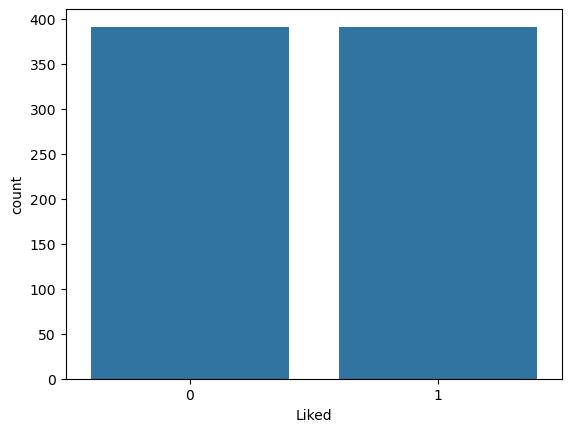

In [16]:
from imblearn.under_sampling import RandomUnderSampler
resampler = RandomUnderSampler(random_state=0)
X_train_undersampled, y_train_undersampled = resampler.fit_resample(X_train, y_train)
sns.countplot(x=y_train_undersampled)


## Text Classification

In [17]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_undersampled, y_train_undersampled)

MultinomialNB()

## Metrics Evaluation

In [18]:

# Making predictions
y_pred = model.predict(X_test)

# Importing metrics
from sklearn import metrics

# Accuracy Score
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}\n")

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm, "\n")

print("-" * 50)

# Classification Report
result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)


Accuracy: 0.47

Confusion Matrix:
[[ 91   0]
 [106   3]] 

--------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.46      1.00      0.63        91
           1       1.00      0.03      0.05       109

    accuracy                           0.47       200
   macro avg       0.73      0.51      0.34       200
weighted avg       0.76      0.47      0.32       200



In [19]:
print(reviews['Review'].apply(type).value_counts())


Review
<class 'list'>    1000
Name: count, dtype: int64


In [20]:
# Converting lists to strings
reviews['Review'] = reviews['Review'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Verifying the data type after conversion
print(reviews['Review'].apply(type).value_counts())


reviews['Encoded_Review'] = reviews['Review'].apply(lambda x: x.encode('utf-8') if isinstance(x, str) else None)

# Debug: Check the output
print(reviews[['Review', 'Encoded_Review']].head())


Review
<class 'str'>    1000
Name: count, dtype: int64
                                              Review  \
0                                     wow love place   
1                                         crust good   
2                                 tasti textur nasti   
3  stop late may bank holiday rick steve recommen...   
4                            select menu great price   

                                      Encoded_Review  
0                                  b'wow love place'  
1                                      b'crust good'  
2                              b'tasti textur nasti'  
3  b'stop late may bank holiday rick steve recomm...  
4                         b'select menu great price'  


## Sentiment Analysis

In [21]:

sentiment=SentimentIntensityAnalyzer()

reviews['compound']=[sentiment.polarity_scores(review)['compound']for review in reviews['Review']]
reviews['neg']=[sentiment.polarity_scores(review)['compound']for review in reviews['Review']]
reviews['neu']=[sentiment.polarity_scores(review)['compound']for review in reviews['Review']]
reviews['pos']=[sentiment.polarity_scores(review)['compound']for review in reviews['Review']]


In [22]:
reviews[['compound','neu','neg','pos']].describe()

,compound,neu,neg,pos
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.161146,0.161146,0.161146,0.161146
std,0.374927,0.374927,0.374927,0.374927
min,-0.865800,-0.865800,-0.865800,-0.865800
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.440400,0.440400,0.440400,0.440400
max,0.923100,0.923100,0.923100,0.923100


## Visualization

<Axes: xlabel='compound', ylabel='Count'>

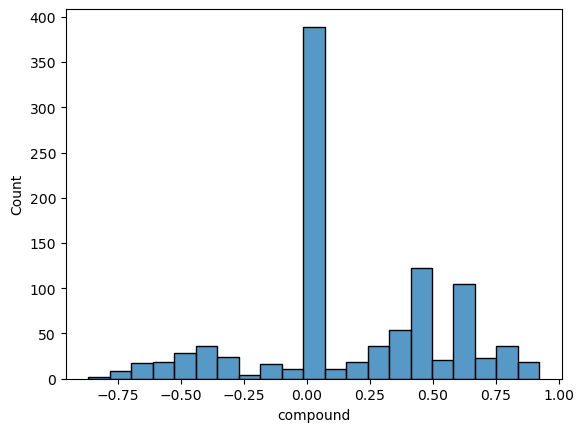

In [23]:
sns.histplot(reviews['compound'])

<Axes: xlabel='pos', ylabel='Count'>

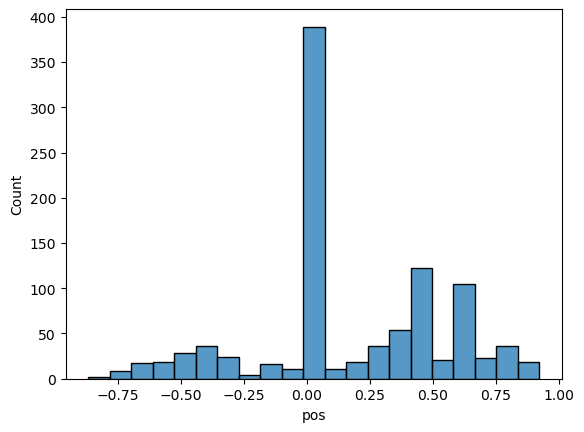

In [24]:
sns.histplot(reviews['pos'])

<Axes: xlabel='neg', ylabel='Count'>

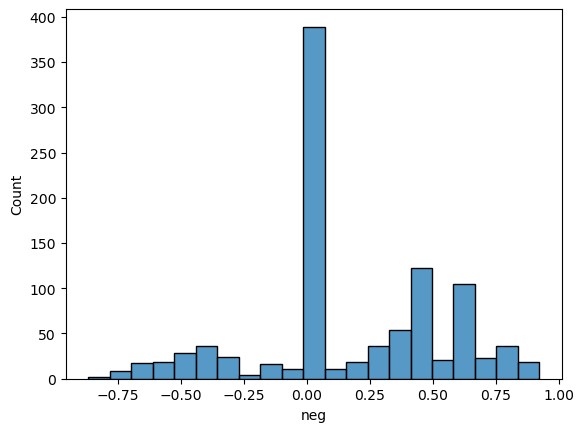

In [25]:
sns.histplot(reviews['neg'])

## Displaying Negative reviews

In [26]:
# Group by 'name' column and calculate the sum of 'compound' for each group
result = reviews[reviews['compound'] <0].groupby('Review')['compound'].sum()

# Displaying the result
print(result)


Review
2 time bad custom servic                                             -0.5423
account know get screw                                               -0.1027
allergi warn menu waitress absolut clue meal contain peanut          -0.1027
also decid send back waitress look like verg heart attack            -0.1531
also order spinach avocado salad ingredi sad dress liter zero tast   -0.4767
                                                                       ...  
worst salmon sashimi                                                 -0.6249
worst servic boot least worri                                        -0.6249
worst sushi ever eat besid costco                                    -0.6249
worst thai ever                                                      -0.6249
would avoid place stay mirag                                         -0.2960
Name: compound, Length: 164, dtype: float64


## percentage of positive and negative review

In [27]:
# Total number of reviews
total_reviews = len(reviews)

# Number of negative reviews
negative_reviews_count = len(reviews[reviews['compound'] <0])

# Percentage of negative reviews
percentage_negative = (negative_reviews_count / total_reviews) * 100

# Creating a DataFrame for the result if needed
result = pd.DataFrame({
    'Total Reviews': [total_reviews],
    'Negative Reviews': [negative_reviews_count],
    'Percentage Negative Reviews': [percentage_negative]
})
result

,Total Reviews,Negative Reviews,Percentage Negative Reviews
0,1000,166,16.6


## visualizating percentage of both positive and negative reviews

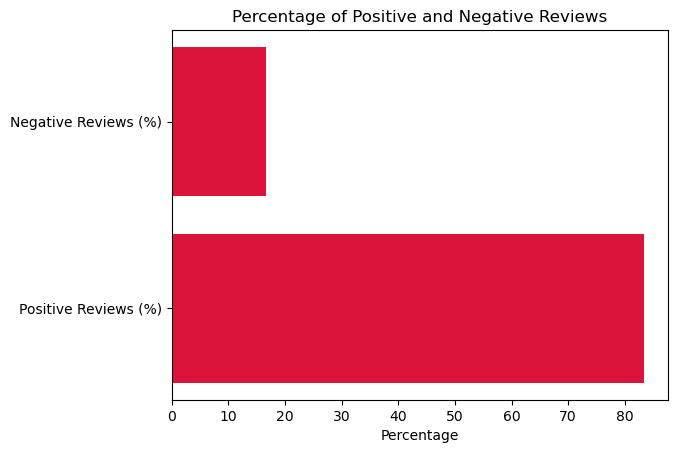

postive reviews are 834
negative reviews are 166


In [28]:

positive_reviews_count=total_reviews-negative_reviews_count
percentage_positive = (positive_reviews_count / total_reviews) * 100
percentage_negative = (negative_reviews_count / total_reviews) * 100

categories = ['Positive Reviews (%)', 'Negative Reviews (%)']
values = [percentage_positive, percentage_negative]

# Create a horizontal bar plot
plt.barh(categories, values, color='crimson')
plt.xlabel('Percentage')
plt.title('Percentage of Positive and Negative Reviews')
plt.show()

print('postive reviews are',positive_reviews_count)
print('negative reviews are',negative_reviews_count)

In [29]:
sia = SentimentIntensityAnalyzer()
reviews['compound'] = reviews['Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

stop_words = nltk.corpus.stopwords.words('english')
def preprocess_text(text):
    tokenized_document = nltk.tokenize.RegexpTokenizer("[a-zA-Z0-9]+").tokenize(text)
    cleaned_tokens = [word.lower() for word in tokenized_document if word.lower() not in stop_words]
    stemmed_text = [nltk.stem.PorterStemmer().stem(word) for word in cleaned_tokens]
    return stemmed_text
print(reviews.columns)
reviews['processed review']=reviews['Review'].apply(preprocess_text)
reviews_positive_subset=reviews.loc[(reviews['Liked']==1)&(reviews['compound'] > 0),:]
reviews_negative_subset=reviews.loc[(reviews['Liked']==0)&(reviews['compound'] < 0),:]


reviews_negative_subset.head()

Index(['Review', 'Liked', 'Encoded_Review', 'compound', 'neg', 'neu', 'pos'], dtype='object')


,Review,Liked,Encoded_Review,compound,neg,neu,pos,processed review
5,get angri want damn pho,0,b'get angri want damn pho',-0.3400,-0.3400,-0.3400,-0.3400,"[get, angri, want, damn, pho]"
14,disgust pretti sure human hair,0,b'disgust pretti sure human hair',-0.3818,-0.3818,-0.3818,-0.3818,"[disgust, pretti, sure, human, hair]"
15,shock sign indic cash,0,b'shock sign indic cash',-0.3818,-0.3818,-0.3818,-0.3818,"[shock, sign, indic, cash]"
20,burritto blah,0,b'burritto blah',-0.1027,-0.1027,-0.1027,-0.1027,"[burritto, blah]"
29,worst salmon sashimi,0,b'worst salmon sashimi',-0.6249,-0.6249,-0.6249,-0.6249,"[worst, salmon, sashimi]"


## Displaying negative reviews using wordcloud

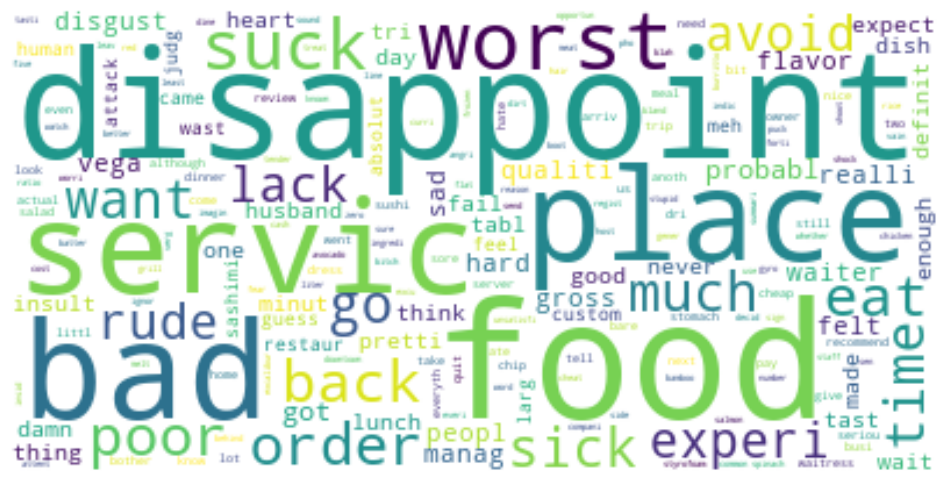

In [30]:
neg_tokens = [word for review in reviews_negative_subset['processed review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Displaying positive reviews using wordcloud

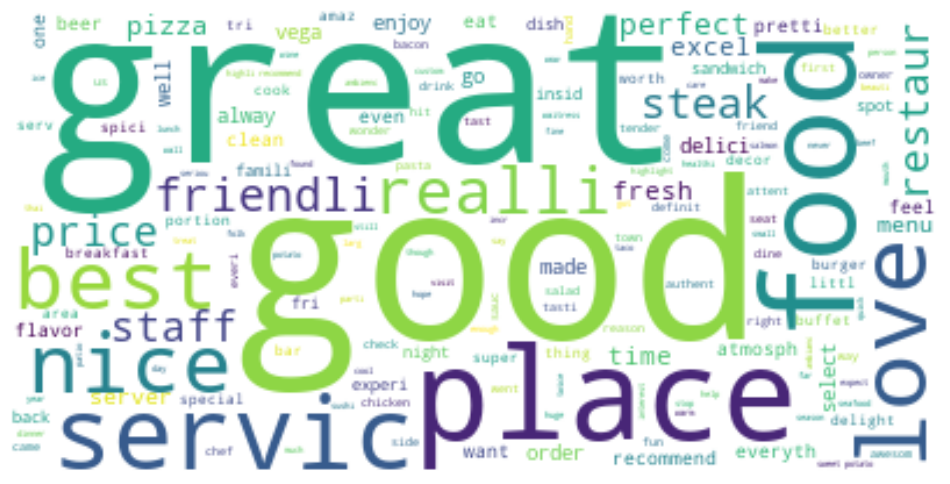

In [31]:
pos_tokens = [word for review in reviews_positive_subset['processed review'] for word in review]
wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Diplaying frequently use positive and negative reviews count

In [32]:
from nltk.probability import FreqDist
pos_freqdist = FreqDist(pos_tokens)
pos_freqdist.tabulate(10)

  good  great  place   food servic   love   nice   best   like realli 
    72     69     42     42     35     30     22     22     20     20 


In [33]:
neg_freqdist = FreqDist(neg_tokens)
neg_freqdist.tabulate(10)

      food disappoint        bad     servic      place      worst       suck       ever       poor       like 
        22         22         17         15         15         13          9          8          6          6 


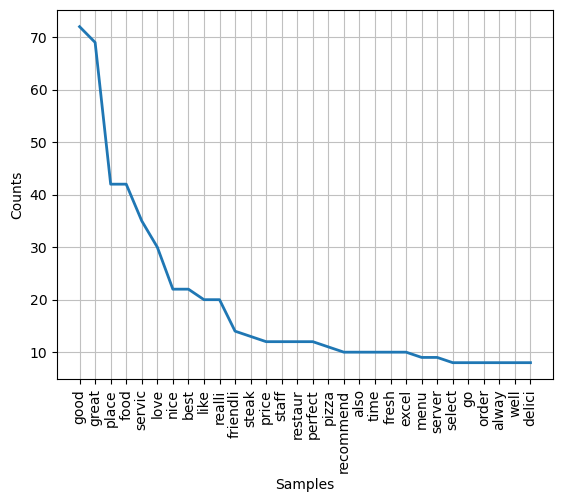

<Axes: xlabel='Samples', ylabel='Counts'>

In [34]:
pos_freqdist.plot(30)

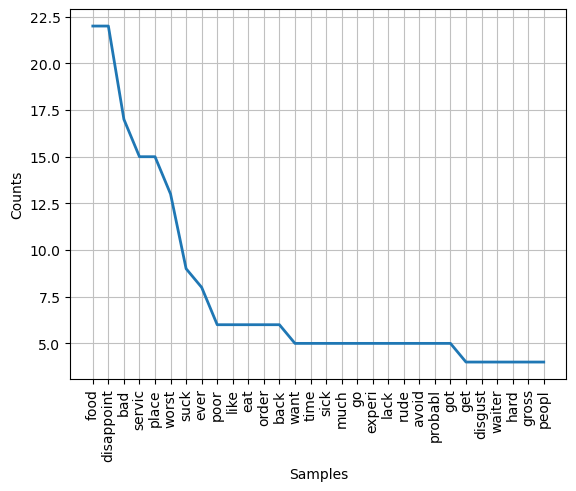

<Axes: xlabel='Samples', ylabel='Counts'>

In [35]:
neg_freqdist.plot(30)